In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
"""Import data and organize it in numpy arrays"""
data = pd.read_csv("C:/Users/WILL2749/Downloads/mnist_train.csv")
labels = np.array(data.iloc[:,0])
x_train = np.array(data.iloc[:,1:])/255

In [27]:
encoded_labels = []
for i in range(len(labels)):
    naked = [0,0,0,0,0,0,0,0,0,0]
    naked[labels[i]] = 1
    encoded_labels.append(naked)

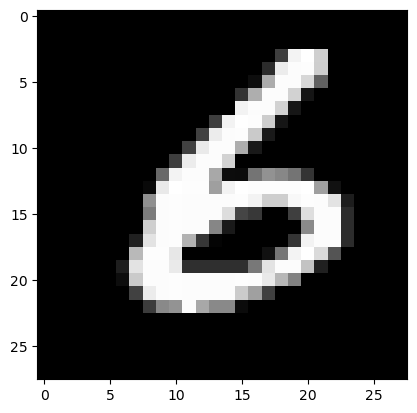

In [28]:
"""Take a look at what the images look like"""
random_index = np.random.randint(0,40000)
img = x_train[random_index].reshape(28,28)
plt.imshow(img, cmap = "gray")

In [29]:
class DNN():
    def __init__(self,layers):
        self.layers = layers
        self.weights = []
        for i in range(len(layers)-1):
            layers_weights = np.random.rand(layers[i+1],layers[i]+1)
            self.weights.append(layers_weights)

    def sigmoid(self,x):
        return 1/(1+np.exp(-.01*x))

    def predict(self,data):
        x_s = [data]

        for i in range(len(self.layers)-1):
          """add bias"""
          x_s[-1] = np.concatenate((x_s[-1],[1]))  
          z = np.dot(self.weights[i],x_s[i])
          x_s.append(self.sigmoid(z))

        return x_s[-1]

    def train(self,data,y_true):
        x_s = [data]

        for i in range(len(self.layers)-1):
          """add bias"""
          x_s[-1] = np.concatenate((x_s[-1],[1]))
          z = np.dot(self.weights[i],x_s[i])
          x_s.append(self.sigmoid(z))

        psi = []
        for i in range(len(y_true)):
          output = x_s[-1][i]
          psi.append(-2*(y_true[i] - output) * (output * (1-output)))
        psi = np.array(psi)
        psi = np.reshape(psi,(psi.shape[0],1))

        gradients = []
        gradients.append(psi*x_s[-2])

        for i in range(len(self.layers) - 2, 0,-1):
            w = self.weights[i][:,:-1]
            x = x_s[i][:-1]
            term = w * x * (1-x)
            term = np.transpose(term)

            psi = np.dot(term, psi)
            psi = np.reshape(psi,(psi.shape[0],1))

            gradients.append(psi*x_s[i-1])

        for i in range(len(gradients)):
            self.weights[i] -= .1*gradients[-(i+1)]
        return sum((y_true-x_s[-1])**2)


Step:  0
Average Error:  0.008590006037645098


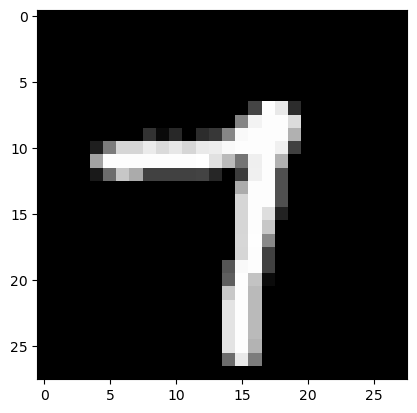

Prediction:  7

Step:  1000
Average Error:  1.3972890900595731


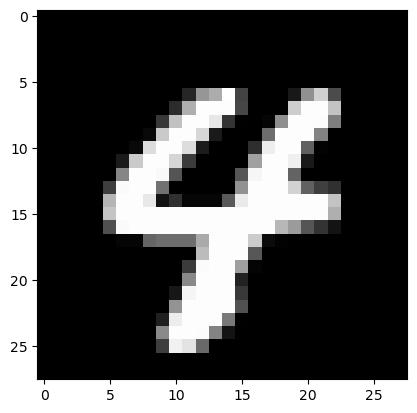

Prediction:  6

Step:  2000
Average Error:  0.8997866084498499


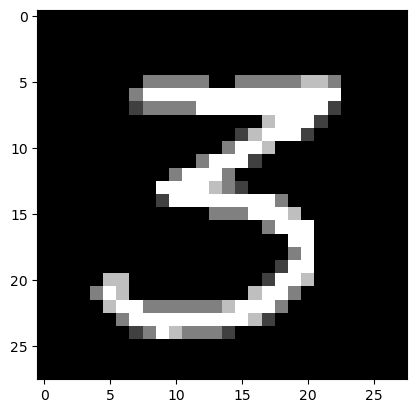

Prediction:  6

Step:  3000
Average Error:  0.8977498512497444


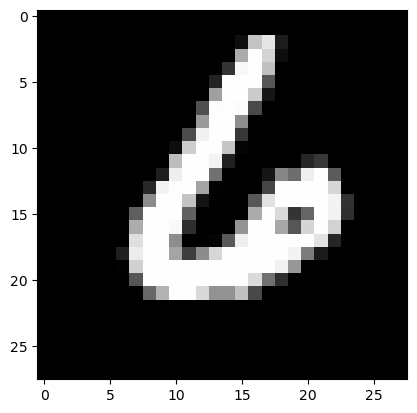

Prediction:  1

Step:  4000
Average Error:  0.8938114222615304


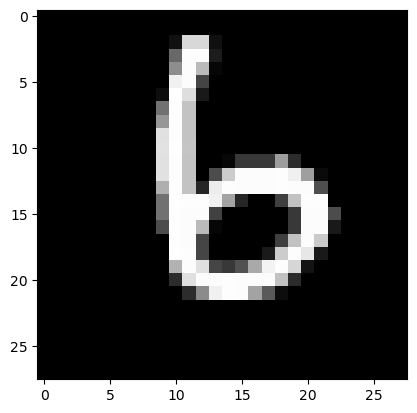

Prediction:  3

Step:  5000
Average Error:  0.8875630227032766


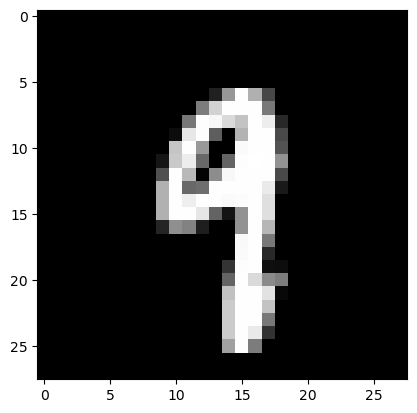

Prediction:  1

Step:  6000
Average Error:  0.8732775421295047


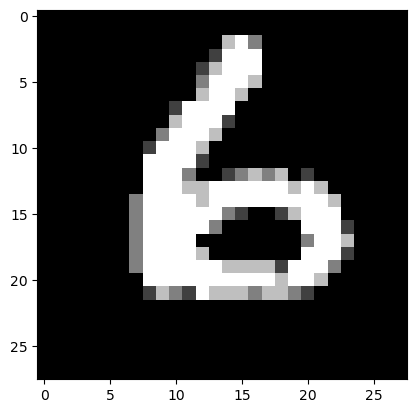

Prediction:  1

Step:  7000
Average Error:  0.8499559347488912


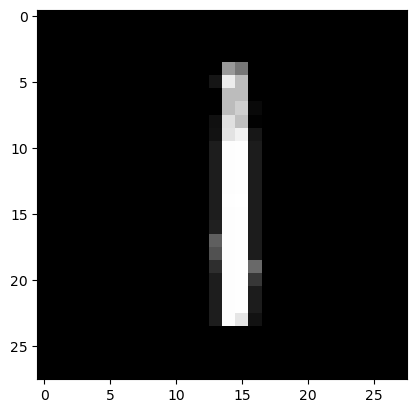

Prediction:  1

Step:  8000
Average Error:  0.7989918698707789


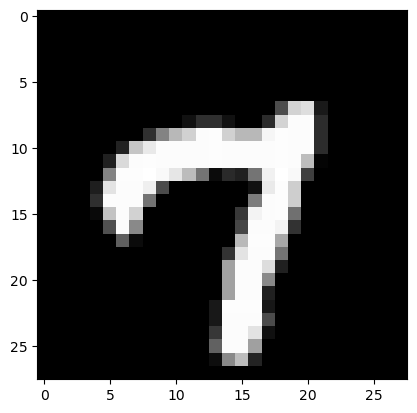

Prediction:  7

Step:  9000
Average Error:  0.7561445651537433


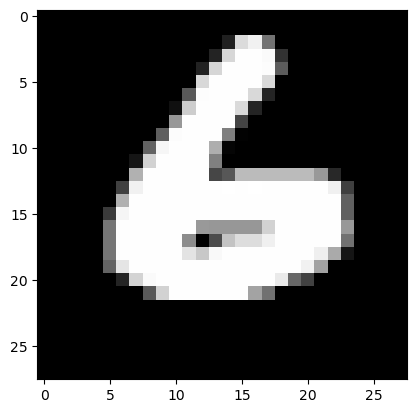

Prediction:  6

Step:  10000
Average Error:  0.7041484872723399


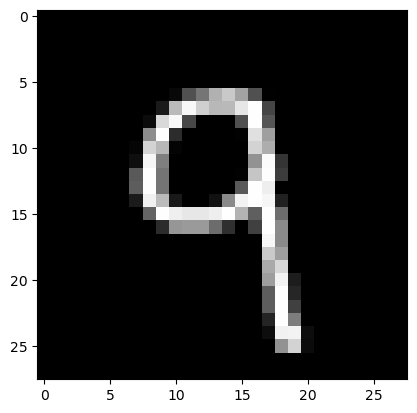

Prediction:  9

Step:  11000
Average Error:  0.6549299490867209


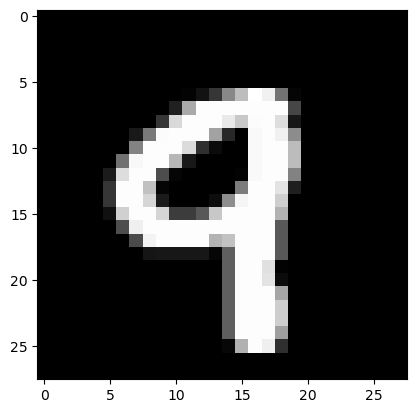

Prediction:  9

Step:  12000
Average Error:  0.6029759218195723


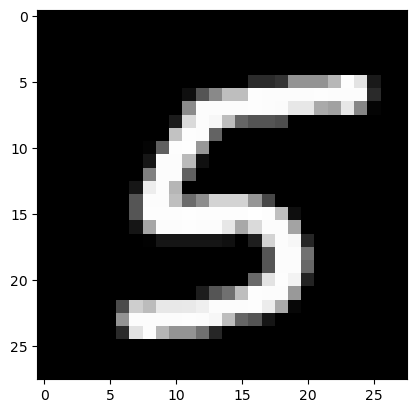

Prediction:  8

Step:  13000
Average Error:  0.5590836504387942


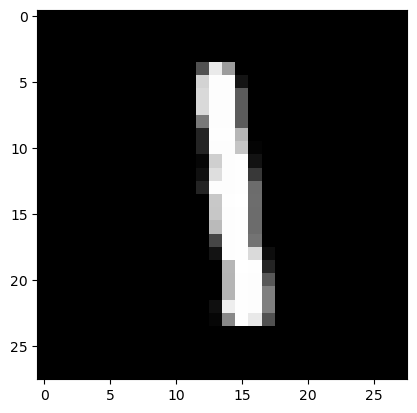

Prediction:  1

Step:  14000
Average Error:  0.5377606609086787


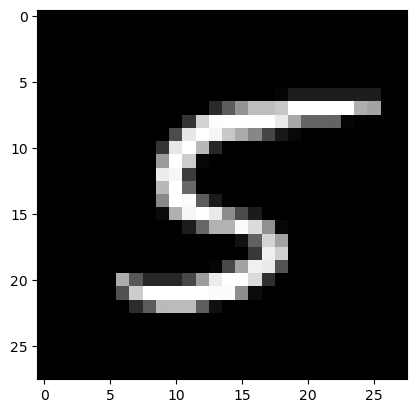

Prediction:  5

Step:  15000
Average Error:  0.5008877139672101


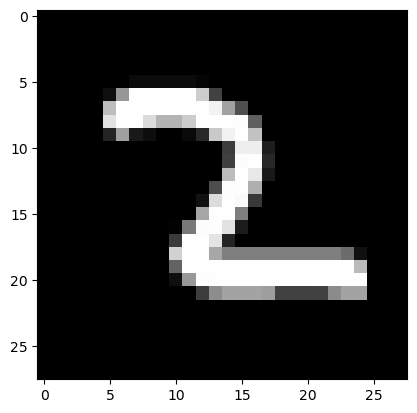

Prediction:  1

Step:  16000
Average Error:  0.4488438619034436


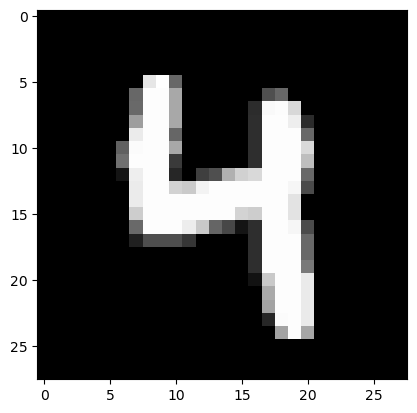

Prediction:  4

Step:  17000
Average Error:  0.44672749641262105


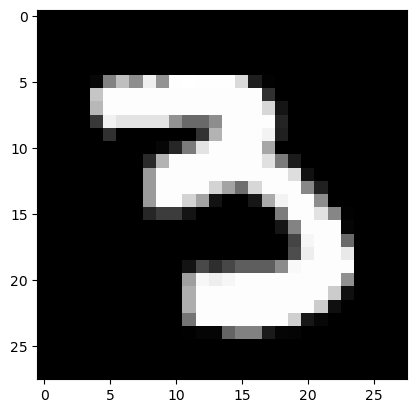

Prediction:  3

Step:  18000
Average Error:  0.40983613938379454


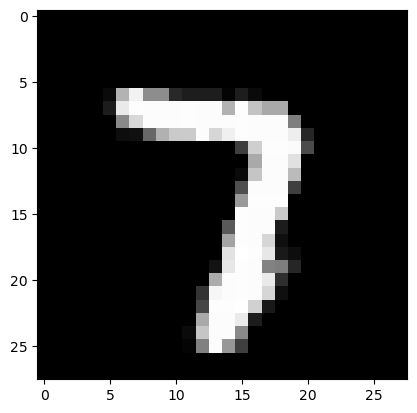

Prediction:  7

Step:  19000
Average Error:  0.4075113314831084


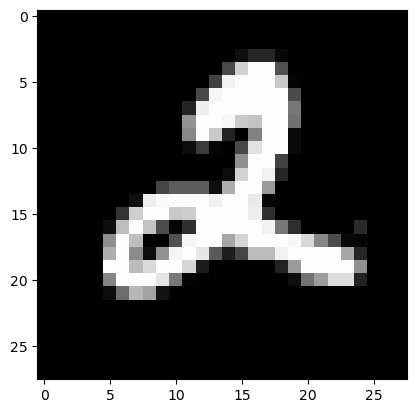

Prediction:  2

Step:  20000
Average Error:  0.38926245145220467


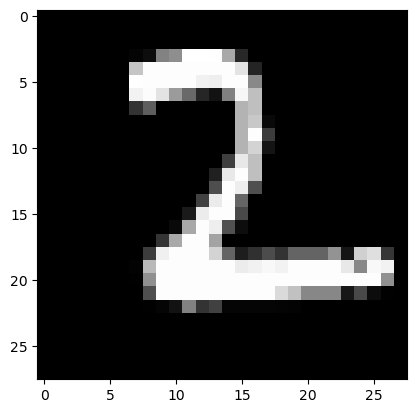

Prediction:  2

Step:  21000
Average Error:  0.3493584037511154


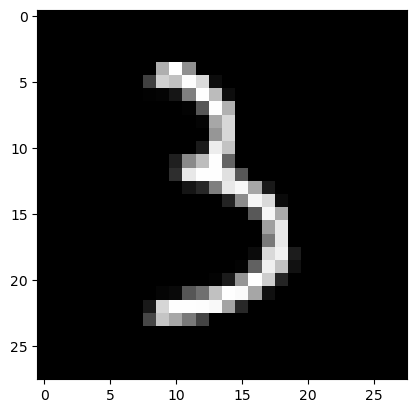

Prediction:  3

Step:  22000
Average Error:  0.3401180866873669


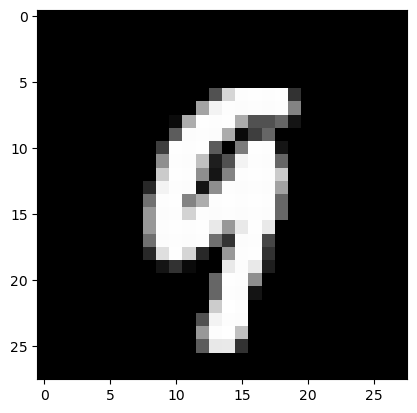

Prediction:  9

Step:  23000
Average Error:  0.3401358200023979


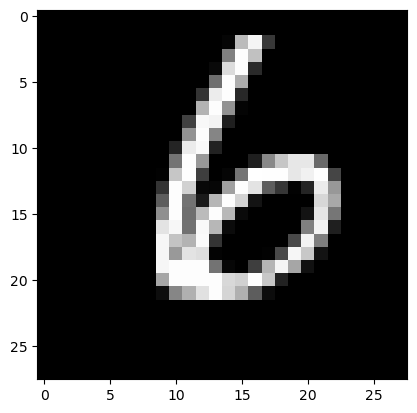

Prediction:  6

Step:  24000
Average Error:  0.33788168828472


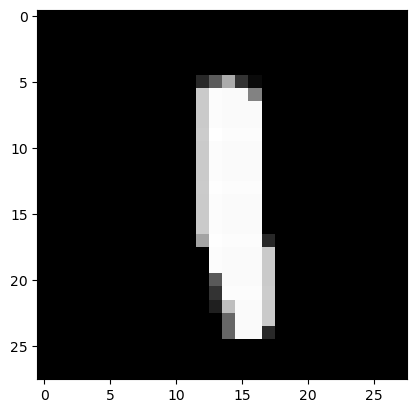

Prediction:  1

Step:  25000
Average Error:  0.29716504607983674


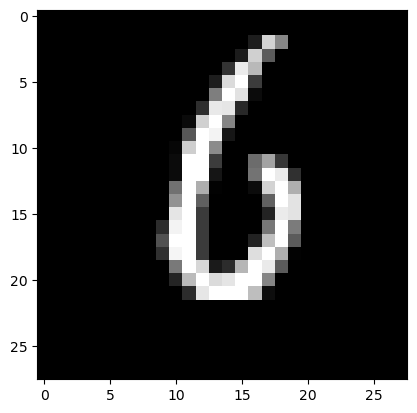

Prediction:  6

Step:  26000
Average Error:  0.3001172639870634


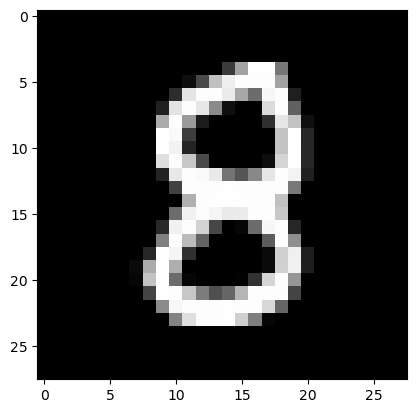

Prediction:  8

Step:  27000
Average Error:  0.29022243244852836


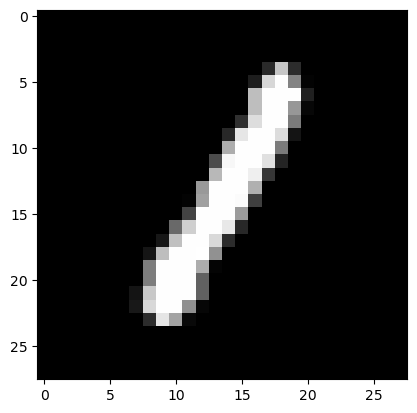

Prediction:  1

Step:  28000
Average Error:  0.2951625243098945


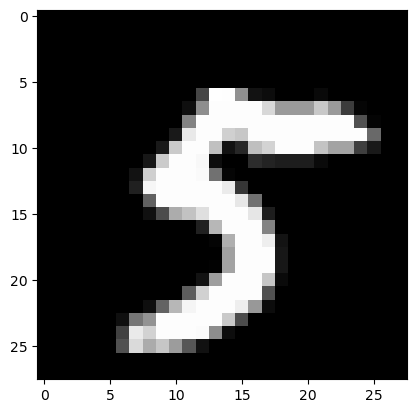

Prediction:  5

Step:  29000
Average Error:  0.2731760174564416


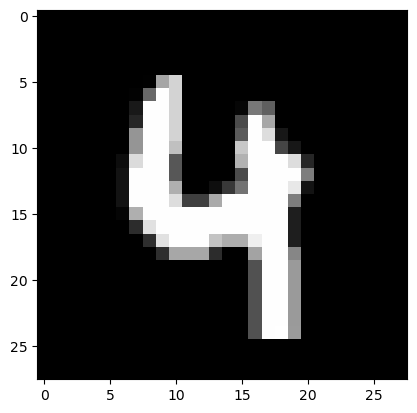

Prediction:  4


In [31]:
model = DNN([784,1250,10])

from collections import deque
error = deque(maxlen = 1000) 

for n in range(30000):
    index = np.random.randint(0,59998)
    error.append(model.train(x_train[index], encoded_labels[index]))
    if n%1000 == 0:
        print("\nStep: ",n)
        print("Average Error: ", sum(error)/1000)
        plt.imshow(x_train[index].reshape(28,28), cmap = "gray")
        plt.show()
        print("Prediction: ", np.argmax(model.predict(x_train[index])))

In [32]:
test_data = pd.read_csv("C:/Users/WILL2749/Downloads/mnist_test.csv")
test_labels = np.array(test_data.iloc[:,0])
x_test = np.array(test_data.iloc[:,1:])/255

correct = 0

for i in range(len(test_data)):
    prediction = np.argmax(model.predict(x_test[i]))
    if prediction == test_labels[i]:
        correct +=1
        
percent_correct = correct/len(test_data) * 100
print(percent_correct,'%')

87.62 %
